In [39]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('actividad2.csv', sep=';')

In [41]:
# Seleccionar variables predictoras y la variable objetivo
predictors = ['Education', 'Occupation', 'Gender', 'MaritalStatus', 'YearlyIncome']
target = 'BikeBuyer'

# Filtrar las columnas necesarias
data_filtered = data[predictors + [target]]

# Convertir variables categóricas en variables dummy
data_filtered = pd.get_dummies(data_filtered)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_filtered.drop(target, axis=1),
                                                    data_filtered[target],
                                                    test_size=0.2,
                                                    random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
print(X_train,)

In [ ]:
print(X_train.iloc[[0]])
print(X_train.columns)

Matriz de Confusión:
[[   0 1675]
 [   0 1996]]


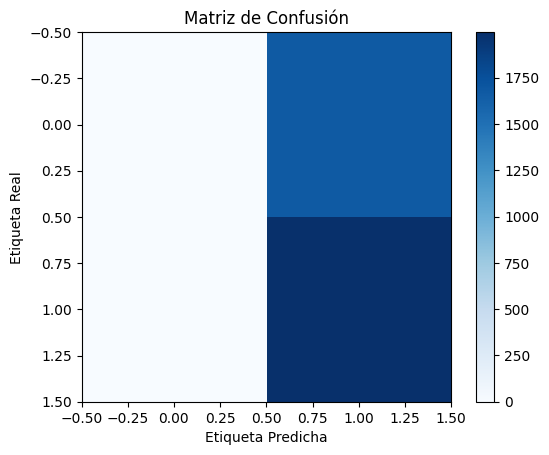

In [42]:
# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualizar la matriz de confusión
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

In [43]:
# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))





Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1675
           1       0.54      1.00      0.70      1996

    accuracy                           0.54      3671
   macro avg       0.27      0.50      0.35      3671
weighted avg       0.30      0.54      0.38      3671



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Hacer una predicción con el modelo estimado (ejemplo)
new_data = pd.DataFrame({'Education': ['Bachelors'],
                         'Occupation': ['Management'],
                         'Gender': ['M'],
                         'MaritalStatus': ['S'],
                         'YearlyIncome': [84340]

                         })


new_data_encoded = pd.get_dummies(new_data)
print(model.feature_names_in_)
print(new_data_encoded.columns)
print(new_data.columns)
print(data_filtered.columns)
prediction = model.predict(new_data_encoded)

print("\nPredicción para el nuevo cliente:", prediction)

In [ ]:
# Crear un DataFrame con las mismas columnas que X_train
new_data1 = pd.DataFrame(columns=X_train.columns, data=[[0]*len(X_train.columns)])

# Asignar los valores de las características para el nuevo cliente
new_data1['Education_Bachelors'] = 1  # Por ejemplo, si el nuevo cliente tiene educación de Bachelors
new_data1['Occupation_Management'] = 1  # Por ejemplo, si el nuevo cliente tiene ocupación de Management
new_data1['Gender_M'] = 1  # Por ejemplo, si el nuevo cliente es de género masculino
new_data1['MaritalStatus_S'] = 1  # Por ejemplo, si el nuevo cliente tiene estado civil soltero
new_data1['YearlyIncome'] = 80000  # Por ejemplo, si el nuevo cliente tiene un ingreso anual de 80000

# Realizar la predicción con el modelo estimado
prediction = model.predict(new_data1)
print("\nPredicción para el nuevo cliente:", prediction)
